# Code part

## Import

In [30]:
# Imports
import skimage
from skimage.filters import threshold_otsu
from skimage import filters, feature
import scipy
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
import scipy.signal

## Task 1

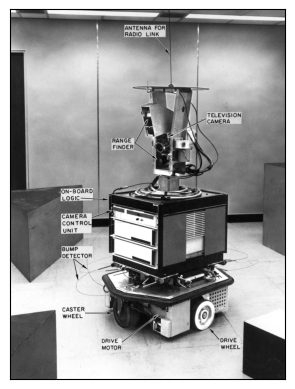

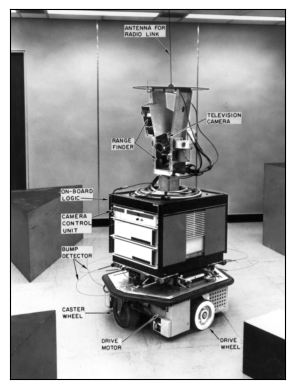

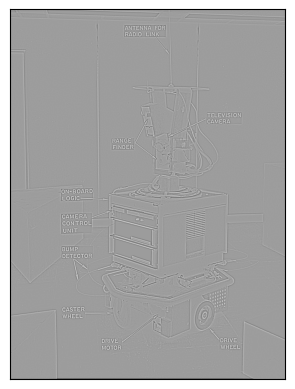

In [31]:
### Task 1
def show_binary_image(image, title=None):
    plt.imshow(image, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()
    
### Laplacian of Guassian ###
def generate_log_mask(std_dev, size):
    """
    Creates a Laplacian of Gaussian filter mask.
    Parameters:
    - std_dev: Gaussian smoothing level.
    - size: Dimensions of mask, should be odd.
    Returns:
    - log_filter: LoG filter mask.
    """
    n = size // 2
    y, x = np.ogrid[-n:n+1, -n:n+1] # Define the grid for the filter mask.
    factor1 =  (x**2 + y**2) / (2 * std_dev**2)
    factor2 = np.exp(- factor1)
    log_filter = - 1 / (np.pi * std_dev**4) * (1 - factor1) * factor2 # Calculate the LoG filter using its mathematical formula.
    log_filter -= log_filter.mean() # Normalize the filter to have zero sum.
    return log_filter

def apply_log_filter(image, std_dev=1, size=9):
    """
    Applies LoG filter to an image.
    Parameters:
    - image: Input image.
    - std_dev: Gaussian standard deviation.
    - size: LoG mask size.
    Returns:
    - Binary image with edges.
    """
    log_mask = generate_log_mask(std_dev, size) # Generate the LoG mask with the given standard deviation and size.
    log_image = scipy.signal.convolve2d(image, log_mask, mode='same')
    return ((log_image - log_image.min()) / (log_image.max() - log_image.min()))

shakey = skimage.color.rgb2gray(skimage.io.imread("C:/_Study_Resource/Study_Note/University/3rd/Computer Vision and images/Report/shakey.jpg"))
shakey_smoothed = filters.gaussian(shakey, sigma=1)
show_binary_image(shakey)
show_binary_image(shakey_smoothed)
show_binary_image(apply_log_filter(shakey_smoothed))

## Task 2

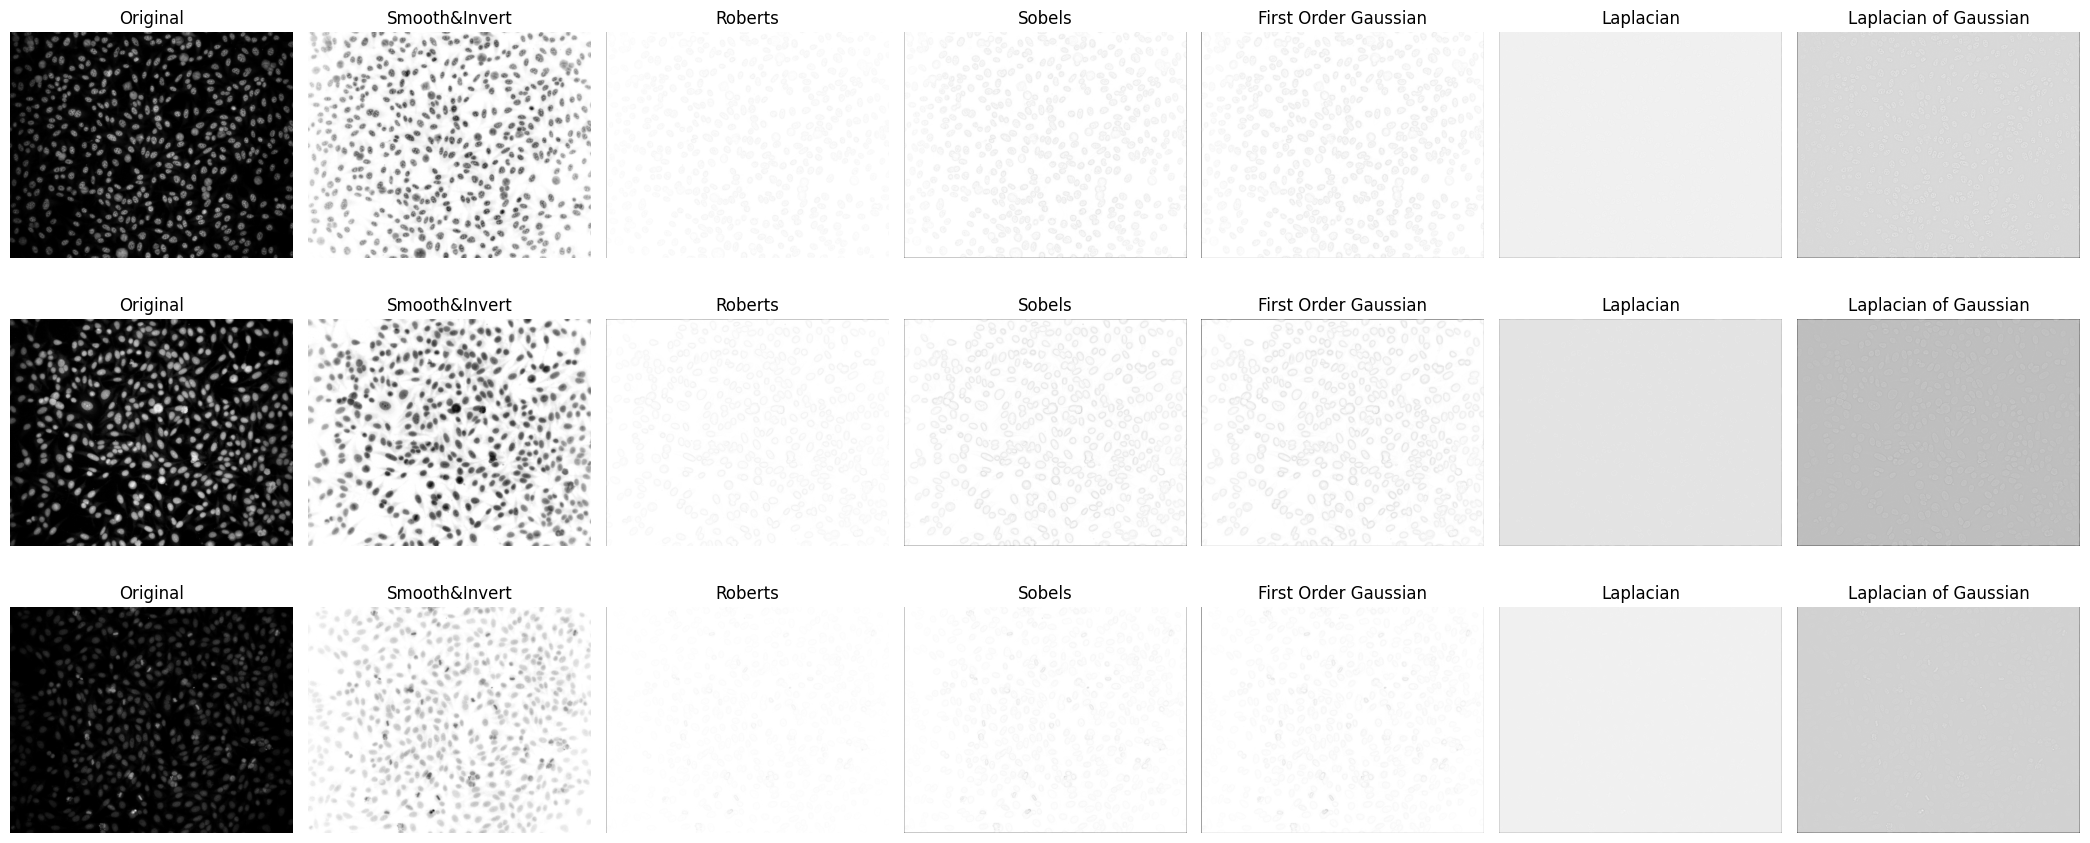

In [32]:
### Task 2 ###
### Roberts ###
def apply_roberts_filter(image):
    """
    Apply the Roberts Cross operator for edge detection.
    Parameters:
    - image: The input image to detect edges on.
    Returns:
    - The edge magnitude image after applying the Roberts Cross operator.
    """
    # Define roberts operators
    roberts_x = np.array([[1,0],[0,-1]])
    roberts_y = np.array([[0,1],[-1,0]])
    # Convolve the image with Roberts kernels
    roberts_cross_x = scipy.signal.convolve2d(image, roberts_x, mode='same')
    roberts_cross_y = scipy.signal.convolve2d(image, roberts_y, mode='same')
    roberts_image = np.sqrt(np.square(roberts_cross_x) + np.square(roberts_cross_y))
    return 1 - ((roberts_image - roberts_image.min()) / (roberts_image.max() - roberts_image.min()))

### Sobel ###
def apply_sobels_filter(image):
    """
    Apply the Sobel operator for edge detection.
    Parameters:
    - image: The input image to detect edges on.
    Returns:
    - The edge magnitude image after applying the Sobel operator.
    """
    #Define sobel operators
    sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    # Convolve the image with Sobel kernels
    sobel_cross_x = scipy.signal.convolve2d(image, sobel_x, mode='same')
    sobel_cross_y = scipy.signal.convolve2d(image, sobel_y, mode='same')
    sobels_image = np.sqrt(np.square(sobel_cross_x) + np.square(sobel_cross_y))
    return 1 - ((sobels_image - sobels_image.min()) / (sobels_image.max() - sobels_image.min()))

### First Order Gaussian ###
def apply_first_order_gaussian_filter(image, std_dev=1, mean = 0, size = 9):
    """
    Apply a first order Gaussian filter to an image for edge detection.
    Parameters:
    - image: The input image to apply the filter on.
    - std_dev: The standard deviation of the Gaussian function.
    - mean: The mean of the Gaussian function.
    - size: The size of the Gaussian filter mask.
    Returns:
    - The edge magnitude image after applying the first order Gaussian filter.
    """
    vec = np.arange(-size // 2, size // 2 + 1, 1, dtype=np.float32)
    zero_mean_gaussian = 1/np.sqrt(2 * np.pi * (std_dev ** 2)) * np.exp(- (vec - mean) ** 2 / (2 * std_dev ** 2))
    first_order_gaussian_mask = - ((vec - mean) / std_dev ** 2) * zero_mean_gaussian

    edge_x = scipy.signal.convolve2d(image, first_order_gaussian_mask[None, :], mode='same')
    edge_y = scipy.signal.convolve2d(image, first_order_gaussian_mask[:, None], mode='same')
    first_order_gaussian_image = np.sqrt(np.square(edge_x) + np.square(edge_y))
    return 1 - ((first_order_gaussian_image - first_order_gaussian_image.min()) / (first_order_gaussian_image.max() - first_order_gaussian_image.min()))

### Laplacian ###
def apply_laplacian_filter(image):
    """
    Apply the Laplacian filter for edge detection.
    Parameters:
    - image: The input image to detect edges on.
    Returns:
    - The edge magnitude image after applying the Laplacian filter.
    """
    # Define laplacian operator
    laplacian_filter = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    laplacian_image = scipy.signal.convolve2d(image, laplacian_filter, mode='same')
    return 1 - ((laplacian_image - laplacian_image.min()) / (laplacian_image.max() - laplacian_image.min()))

def show_filter_results(images_orginal, images, functions, function_names):
    """
    Display the results of applying each filter to each image in a grid of subplots.
    """
    num_images = len(images)
    num_functions = len(functions)
    nrows = num_images
    ncols = num_functions + 2 
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows * 3))
    for i, image in enumerate(images):
        axes[i, 0].imshow(images_orginal[i], cmap='gray')
        axes[i, 0].set_title('Original')
        axes[i, 0].axis('off')
        axes[i, 1].imshow(image, cmap='gray')
        axes[i, 1].set_title('Smooth&Invert')
        axes[i, 1].axis('off')
        for j, function in enumerate(functions):
            filtered_image = function(image)
            ax = axes[i, j + 2] 
            ax.imshow(filtered_image, cmap='gray')
            ax.set_title(function_names[j])
            ax.axis('off')
    plt.tight_layout()
    plt.show()

cells1 = skimage.color.rgb2gray(skimage.io.imread("C:/_Study_Resource/Study_Note/University/3rd/Computer Vision and images/Report/Data/Cells/9343 AM.bmp"))
cells2 = skimage.color.rgb2gray(skimage.io.imread("C:/_Study_Resource/Study_Note/University/3rd/Computer Vision and images/Report/Data/Cells/10905 JL.bmp"))
cells3 = skimage.color.rgb2gray(skimage.io.imread("C:/_Study_Resource/Study_Note/University/3rd/Computer Vision and images/Report/Data/Cells/43590 AM.bmp"))
cells_orginal = [cells1, cells2, cells3]
cells = [1 - filters.gaussian(cells1, sigma=1), 1 - filters.gaussian(cells2, sigma=1), 1 - filters.gaussian(cells3, sigma=1)]
functions = [apply_roberts_filter, apply_sobels_filter, apply_first_order_gaussian_filter, apply_laplacian_filter, apply_log_filter]
function_names = ["Roberts", "Sobels", "First Order Gaussian", "Laplacian", "Laplacian of Gaussian"]
show_filter_results(cells_orginal, cells, functions, function_names)

## Task 3

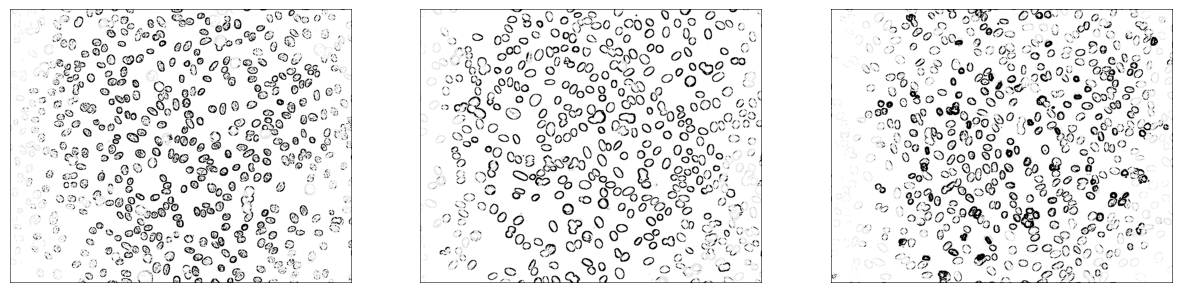

In [33]:
### Task 3: Canny ###
def apply_canny_filter(image, std_dev = 1, size= 9, high_ratio=0.90, low_ratio=0.50):
    """
    Apply the Canny filter for edge detection.
    Parameters:
    - image: The input image to apply the filter on.
    - std_dev: The standard deviation of the Gaussian function.
    - size: The size of the Gaussian filter mask.
    - high_ratio: upper threshold
    - low_ratio: lower threshold
    Returns:
    - The edge image after applying the Canny filter.
    """
    n = size // 2
    y, x = np.ogrid[-n:n+1, -n:n+1]
    G = 1 / (2 * np.pi * std_dev**2) * np.exp(-(x**2 + y**2) / (2 * std_dev**2))
    Gx, Gy = (-x / std_dev**2) * G, (-y / std_dev**2) * G
    fx, fy = scipy.signal.convolve(image, Gx, mode='same'), scipy.signal.convolve(image, Gy, mode='same')
    magnitude, direction = np.abs(fx) + np.abs(fy), np.arctan2(fx, fy)
    
    canny_image = np.zeros_like(magnitude)
    
    angle_map = {0: (0, 1), 45: (1, 1), 90: (1, 0), 135: (1, -1)}
    for i in range(1, magnitude.shape[0]-1):
        for j in range(1, magnitude.shape[1]-1):
            angle = round(direction[i, j] / 45) * 45 % 180
            q, r = [magnitude[i + angle_map[angle][0]*k, j + angle_map[angle][1]*k] for k in (-1, 1)]
            canny_image[i, j] = magnitude[i, j] if magnitude[i, j] >= q and magnitude[i, j] >= r else 0
    
    high_threshold = np.percentile(magnitude, high_ratio * 100)
    low_threshold = high_threshold * low_ratio
    strong = magnitude >= high_threshold
    weak = (magnitude <= high_threshold) & (magnitude >= low_threshold)
    
    canny_image = np.where(strong, 255, np.where(weak, 25, 0))
    return 1 - ((canny_image - canny_image.min()) / (canny_image.max() - canny_image.min()))

def show_canny_results(images):
    """
    Apply Canny edge detection to each image in the list and display the results side by side.
    """
    num_images = len(images)
    plt.figure(figsize=(num_images * 5, 5))
    for i, image in enumerate(images):
        edges = apply_canny_filter(image)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(edges, cmap='gray')
        plt.axis('off')
    plt.show()

show_canny_results(cells)

## Task 4

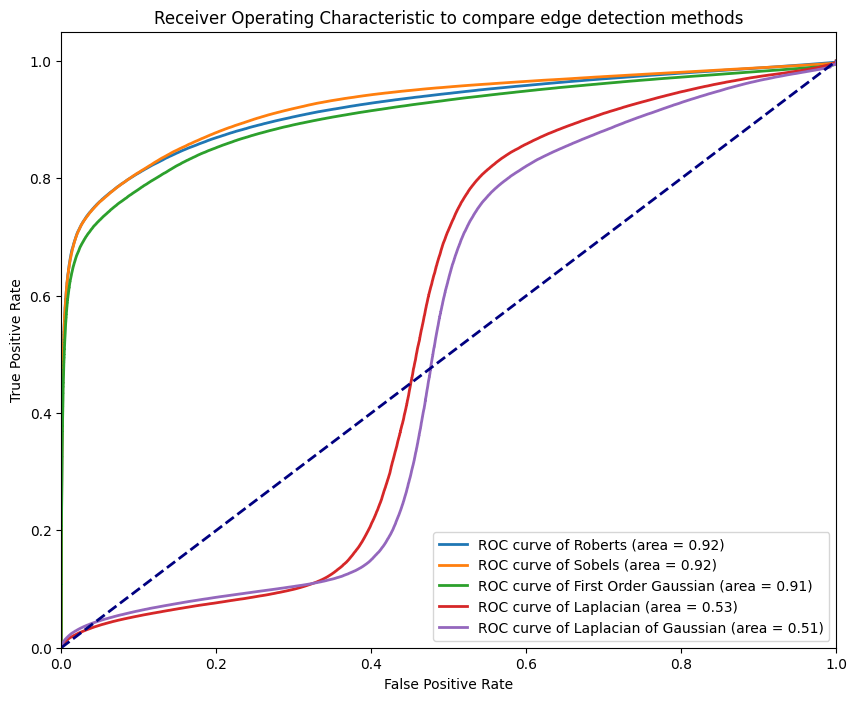

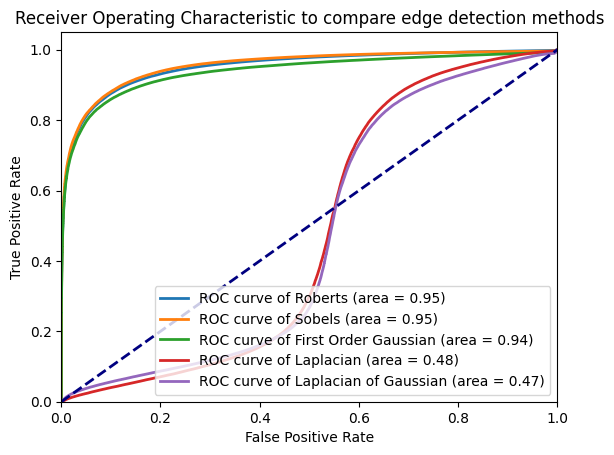

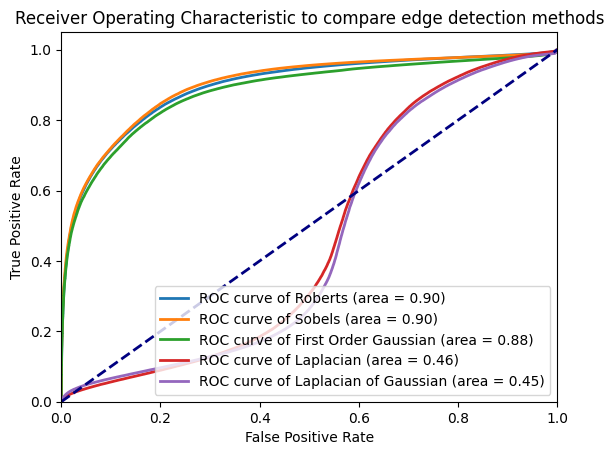

In [34]:
### Task 4 ###
def show_ROC_curve(images, images_edge, methods, method_names):
    """
    Display ROC curves to compare the performance of different edge detection methods.
    """
    plt.figure(figsize=(10, 8))
    for index, image in enumerate(images):
        ground_truth_image = images_edge[index]
        predict_images = [method(image) for method in methods]
        assert len(predict_images) == len(method_names)
        for predict_image, method_name in zip(predict_images, method_names):
            fpr, tpr, thresholds = roc_curve(ground_truth_image.ravel(), predict_image.ravel())
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label='ROC curve of %s (area = %0.2f)' % (method_name, roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic to compare edge detection methods')
        plt.legend(loc="lower right")
        plt.show()

cells1_edge = skimage.color.rgb2gray(skimage.io.imread("C:/_Study_Resource/Study_Note/University/3rd/Computer Vision and images/Report/Data/Cells/9343 AM Edges.bmp"))
cells2_edge = skimage.color.rgb2gray(skimage.io.imread("C:/_Study_Resource/Study_Note/University/3rd/Computer Vision and images/Report/Data/Cells/10905 JL Edges.bmp"))
cells3_edge = skimage.color.rgb2gray(skimage.io.imread("C:/_Study_Resource/Study_Note/University/3rd/Computer Vision and images/Report/Data/Cells/43590 AM Edges.bmp"))
cells_edge = [cells1_edge, cells2_edge, cells3_edge]
show_ROC_curve(cells, cells_edge, functions, function_names)